In [2]:
import folium

# 1. Definir los datos basados en el contrato de futuros de maíz
# Las coordenadas son aproximadas a los centros de estas ciudades/distritos.
locations = [
    # Base: Contract Price (Premium = 0)
    {"name": "Chicago Switching District", "coords": [41.8781, -87.6298], "premium": 0.00, "color": "gray"},
    {"name": "Burns Harbor Switching District", "coords": [41.6141, -87.1311], "premium": 0.00, "color": "gray"},

    # Lockport-Seneca (+4.75 cents)
    {"name": "Lockport", "coords": [41.5892, -88.0583], "premium": 4.75, "color": "green"},
    {"name": "Seneca", "coords": [41.3106, -88.6080], "premium": 4.75, "color": "green"},

    # Ottawa-Chillicothe (+6.25 cents)
    {"name": "Ottawa", "coords": [41.3456, -88.8426], "premium": 6.25, "color": "blue"},
    {"name": "Chillicothe", "coords": [40.9223, -89.4862], "premium": 6.25, "color": "blue"},

    # Peoria-Pekin (+8.75 cents)
    {"name": "Peoria", "coords": [40.6936, -89.5890], "premium": 8.75, "color": "purple"},
    {"name": "Pekin", "coords": [40.5675, -89.6407], "premium": 8.75, "color": "purple"},

    # Havana-Grafton (+10.25 cents)
    {"name": "Havana", "coords": [40.3003, -90.0604], "premium": 10.25, "color": "orange"},
    {"name": "Grafton", "coords": [38.9701, -90.4283], "premium": 10.25, "color": "orange"},

    # St. Louis-East St. Louis and Alton (+16.25 cents)
    {"name": "St. Louis / East St. Louis", "coords": [38.6270, -90.1994], "premium": 16.25, "color": "red"},
    {"name": "Alton", "coords": [38.8906, -90.1843], "premium": 16.25, "color": "red"},
]

# 2. Crear el mapa centrado en Illinois
# Coordenadas centrales aproximadas entre Chicago y St. Louis
mapa = folium.Map(location=[40.5, -89.0], zoom_start=7, tiles="Cartodb Positron")

# Título del mapa (inyectado como HTML)
title_html = '''
     <h3 align="center" style="font-size:20px"><b>Primas de Entrega de Futuros de Maíz (Centavos/Bushel)</b></h3>
     '''
mapa.get_root().html.add_child(folium.Element(title_html))

# 3. Agregar marcadores al mapa
for loc in locations:
    # Crear el texto del popup
    popup_text = f"""
    <b>Ubicación:</b> {loc['name']}<br>
    <b>Prima:</b> +{loc['premium']} ¢<br>
    """
    
    # Añadir un marcador circular
    folium.CircleMarker(
        location=loc["coords"],
        radius=10,
        popup=popup_text,
        color=loc["color"],
        fill=True,
        fill_color=loc["color"],
        fill_opacity=0.7
    ).add_to(mapa)
    
    # Añadir una etiqueta de texto permanente (Tooltip)
    folium.Marker(
        location=loc["coords"],
        icon=folium.DivIcon(
            html=f'<div style="font-size: 10pt; color: black; font-weight: bold;">{loc["premium"]}¢</div>'
        )
    ).add_to(mapa)

# 4. Guardar el mapa
output_file = "mapa_maiz.html"
mapa.save(output_file)

print(f"Mapa generado exitosamente como '{output_file}'. Ábrelo en tu navegador.")

Mapa generado exitosamente como 'mapa_maiz.html'. Ábrelo en tu navegador.


$ZCH25.CBT: possibly delisted; no timezone found
[**********************47%                       ]  7 of 15 completed$ZCU25.CBT: possibly delisted; no timezone found
[**********************60%****                   ]  9 of 15 completed$ZCZ25.CBT: possibly delisted; no timezone found
[**********************87%*****************      ]  13 of 15 completed$ZCK25.CBT: possibly delisted; no timezone found
[*********************100%***********************]  15 of 15 completed

4 Failed downloads:
['ZCH25.CBT', 'ZCU25.CBT', 'ZCZ25.CBT', 'ZCK25.CBT']: possibly delisted; no timezone found


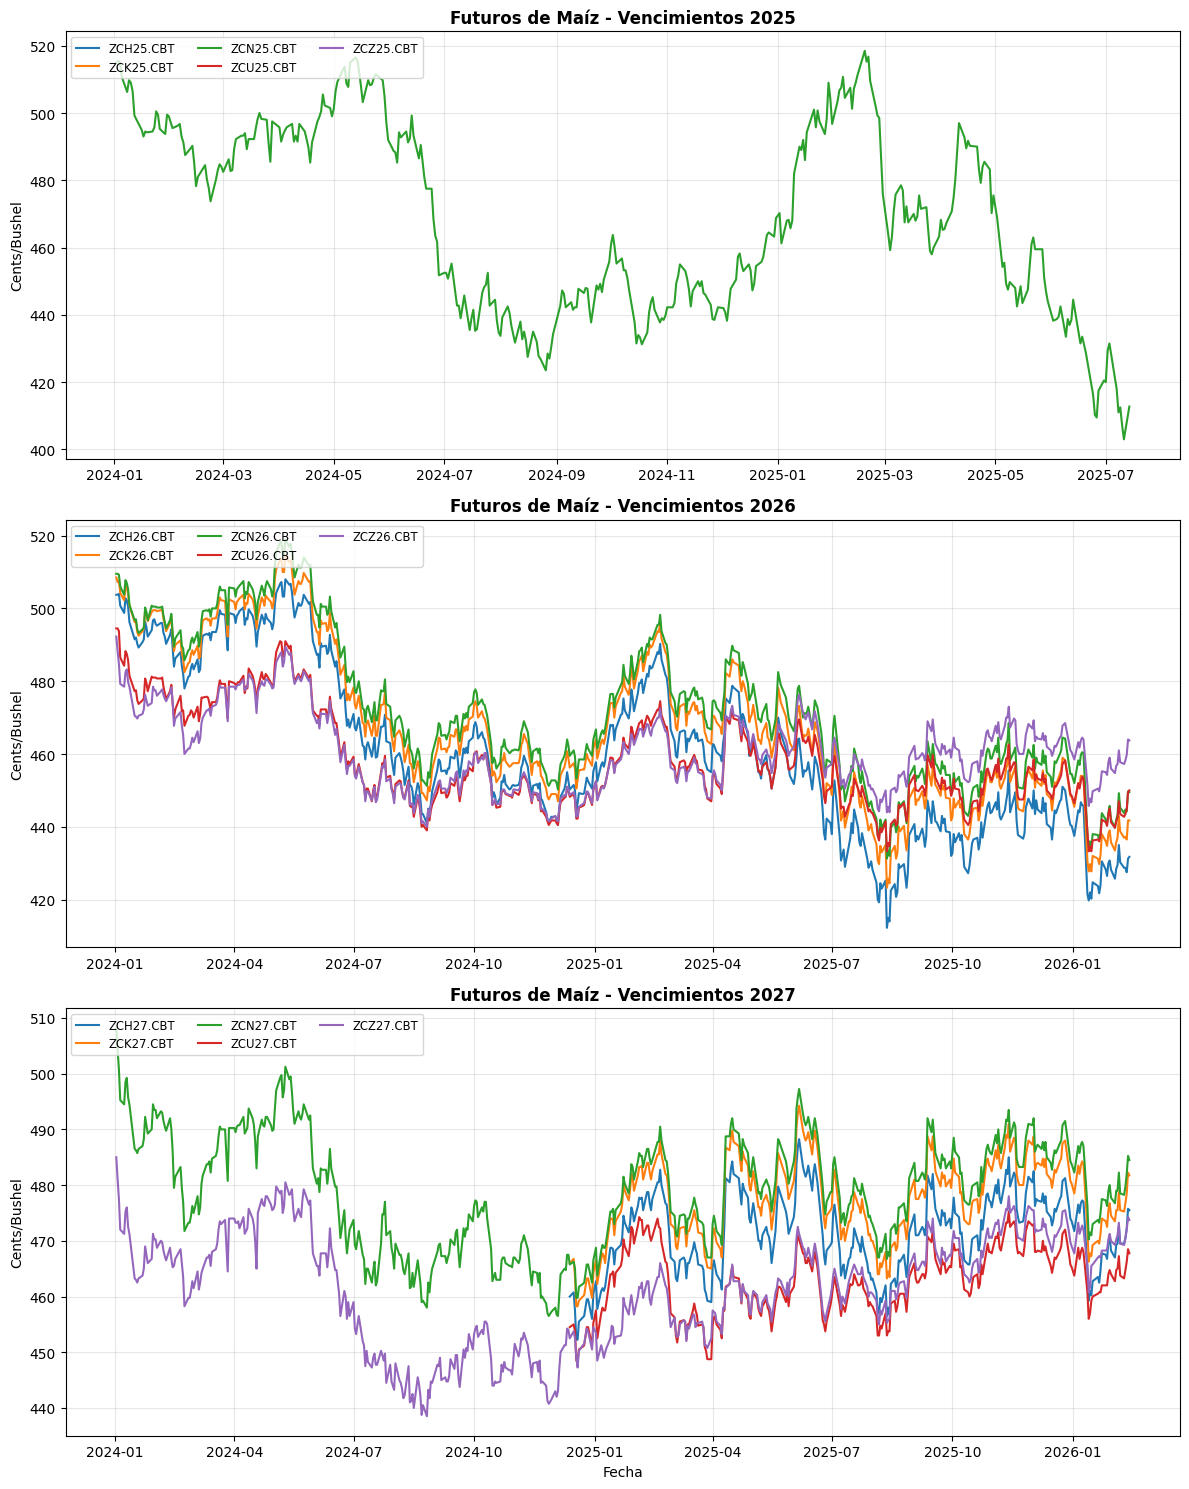

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

# 1. Definir los grupos de tickers por año
tickers_2025 = ["ZCH25.CBT", "ZCK25.CBT", "ZCN25.CBT", "ZCU25.CBT", "ZCZ25.CBT"]
tickers_2026 = ["ZCH26.CBT", "ZCK26.CBT", "ZCN26.CBT", "ZCU26.CBT", "ZCZ26.CBT"]
tickers_2027 = ["ZCH27.CBT", "ZCK27.CBT", "ZCN27.CBT", "ZCU27.CBT", "ZCZ27.CBT"]

todos_los_tickers = tickers_2025 + tickers_2026 + tickers_2027

# 2. Descargar datos (Precios de Cierre)
# Usamos una fecha que cubra el ciclo de vida de los contratos de 2025 también
data = yf.download(todos_los_tickers, start="2024-01-01")['Close']

# 3. Crear la figura con 3 subgráficos (uno para cada año)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=False)

# --- Gráfico 2025 ---
for t in tickers_2025:
    ax1.plot(data.index, data[t], label=t)
ax1.set_title('Futuros de Maíz - Vencimientos 2025', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cents/Bushel')
ax1.legend(loc='upper left', fontsize='small', ncol=3)
ax1.grid(True, alpha=0.3)

# --- Gráfico 2026 ---
for t in tickers_2026:
    ax2.plot(data.index, data[t], label=t)
ax2.set_title('Futuros de Maíz - Vencimientos 2026', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cents/Bushel')
ax2.legend(loc='upper left', fontsize='small', ncol=3)
ax2.grid(True, alpha=0.3)

# --- Gráfico 2027 ---
for t in tickers_2027:
    ax3.plot(data.index, data[t], label=t)
ax3.set_title('Futuros de Maíz - Vencimientos 2027', fontsize=12, fontweight='bold')
ax3.set_ylabel('Cents/Bushel')
ax3.set_xlabel('Fecha')
ax3.legend(loc='upper left', fontsize='small', ncol=3)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()